# Analysis of the Top 500 HPC systems
## Nov/2020 edition

To jump directly to a section, click on the link below:<br>
- [Worldwide](#ww)
- [United States](#usa)
- [Canada](#canada)
- [Worldwide, excluding China](#ww-non-china)

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

pd.options.display.float_format = "{:,.2f}".format

In [3]:
df = pd.read_excel('TOP500_202011.xls')

#### Drop some columns, and do overall clean-up

In [4]:
df.drop(['Previous Rank', 'First Appearance', 'First Rank', 'Site ID', 'System ID'], axis=1, inplace=True)

In [5]:
cond = df['Manufacturer'] == 'ACTION'
df[cond]

,Rank,Name,Computer,Site,Manufacturer,Country,Year,Segment,Total Cores,Accelerator/Co-Processor Cores,Rmax [TFlop/s],Rpeak [TFlop/s],Nmax,Nhalf,HPCG [TFlop/s],Power (kW),Power Source,Power Efficiency [GFlops/Watts],Memory,Architecture,Processor,Processor Technology,Processor Speed (MHz),Operating System,OS Family,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent
88,89,Cedar (GPU),"PowerEdge C6420, Xeon Silver 4216 16C 2.1GHz, ...",Simon Fraser University/Compute Canada,ACTION,Canada,2020,Academic,67584,"61,440.00","3,371.00","5,834.40","1,780,800.00",nan,nan,310.00,Submitted,10.87,nan,Cluster,Xeon Silver 4216 16C 2.1GHz,Intel Skylake,2100,CentOS,Linux,NVIDIA Tesla V100,16,Xeon Silver,PowerEdge C6420,Dell PowerEdge Cluster,Omnipath,Intel Omni-Path,North America
137,138,Cedar (CPU),"PowerEdge C6420, Xeon Platinum 8160 24C 2.1GH...",Simon Fraser University/Compute Canada,ACTION,Canada,2020,Academic,67584,nan,"2,607.98","4,895.54","4,320,000.00",nan,nan,792.00,Submitted,3.29,nan,Cluster,Xeon Platinum 8260 24C 2.4GHz,Intel Cascade lake,2400,CentOS,Linux,None,24,Xeon Platinum 82xx (Cascade Lake),PowerEdge C6420,Dell PowerEdge Cluster,Omnipath,Intel Omni-Path,North America


In [6]:
cond = df['Manufacturer'] == 'ACTION'
df.loc[cond, 'Manufacturer'] = 'Dell EMC'

In [7]:
df.head()

,Rank,Name,Computer,Site,Manufacturer,Country,Year,Segment,Total Cores,Accelerator/Co-Processor Cores,Rmax [TFlop/s],Rpeak [TFlop/s],Nmax,Nhalf,HPCG [TFlop/s],Power (kW),Power Source,Power Efficiency [GFlops/Watts],Memory,Architecture,Processor,Processor Technology,Processor Speed (MHz),Operating System,OS Family,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent
0,1,Supercomputer Fugaku,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",RIKEN Center for Computational Science,Fujitsu,Japan,2020,Research,7630848,nan,"442,010.00","537,212.00","21,288,960.00",nan,"16,004.50","29,899.23",Submitted,14.78,nan,MPP,A64FX 48C 2.2GHz,Fujitsu ARM,2200,Red Hat Enterprise Linux,Linux,None,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia
1,2,Summit,"IBM Power System AC922, IBM POWER9 22C 3.07GHz...",DOE/SC/Oak Ridge National Laboratory,IBM,United States,2018,Research,2414592,"2,211,840.00","148,600.00","200,794.88","16,473,600.00",nan,"2,925.75","10,096.00",Submitted,14.72,nan,Cluster,IBM POWER9 22C 3.07GHz,Power,3070,RHEL 7.4,Linux,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America
2,3,Sierra,"IBM Power System AC922, IBM POWER9 22C 3.1GHz,...",DOE/NNSA/LLNL,IBM / NVIDIA / Mellanox,United States,2018,Research,1572480,"1,382,400.00","94,640.00","125,712.00","11,902,464.00",nan,"1,795.67","7,438.28",Submitted,12.72,nan,Cluster,IBM POWER9 22C 3.1GHz,Power,3100,Red Hat Enterprise Linux,Linux,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America
3,4,Sunway TaihuLight,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway",National Supercomputing Center in Wuxi,NRCPC,China,2016,Research,10649600,nan,"93,014.59","125,435.90","12,288,000.00",nan,480.85,"15,371.00",Submitted,6.05,nan,MPP,Sunway SW26010 260C 1.45GHz,ShenWei,1450,Sunway RaiseOS 2.0.5,Linux,None,260,Sunway,Sunway MPP,Sunway Cluster,Custom Interconnect,Sunway,Asia
4,5,Selene,"NVIDIA DGX A100, AMD EPYC 7742 64C 2.25GHz, NV...",NVIDIA Corporation,Nvidia,United States,2020,Vendor,555520,"483,840.00","63,460.00","79,215.00","6,598,656.00",nan,"1,622.51","2,646.00",Submitted,23.98,nan,Cluster,AMD EPYC 7742 64C 2.25GHz,AMD Zen-2 (Rome),2250,Ubuntu 20.04.1 LTS,Linux,NVIDIA A100,64,AMD Rome,NVIDIA DGX A100,NVIDIA DGX,Infiniband,Mellanox HDR Infiniband,North America


In [8]:
df.isnull().sum()

Rank                                 0
Name                               185
Computer                             0
Site                                 0
Manufacturer                         0
Country                              0
Year                                 0
Segment                              0
Total Cores                          0
Accelerator/Co-Processor Cores     351
Rmax [TFlop/s]                       0
Rpeak [TFlop/s]                      0
Nmax                                 5
Nhalf                              488
HPCG [TFlop/s]                     427
Power (kW)                         311
Power Source                       311
Power Efficiency [GFlops/Watts]    311
Memory                             499
Architecture                         0
Processor                            0
Processor Technology                 0
Processor Speed (MHz)                0
Operating System                     0
OS Family                            0
Accelerator/Co-Processor 

In [9]:
# df['Accelerator/Co-Processor Cores'].fillna(0, inplace=True)
df['Accelerator/Co-Processor'].replace('None', np.nan, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             500 non-null    int64  
 1   Name                             315 non-null    object 
 2   Computer                         500 non-null    object 
 3   Site                             500 non-null    object 
 4   Manufacturer                     500 non-null    object 
 5   Country                          500 non-null    object 
 6   Year                             500 non-null    int64  
 7   Segment                          500 non-null    object 
 8   Total Cores                      500 non-null    int64  
 9   Accelerator/Co-Processor Cores   149 non-null    float64
 10  Rmax [TFlop/s]                   500 non-null    float64
 11  Rpeak [TFlop/s]                  500 non-null    float64
 12  Nmax                  

***
<a id='ww'></a>
## Worldwide

#### Observations about manufacturers used in China-based HPC environments:
- `Inspur` and `Sugon` are only deployed in `China`.
- About <span style='color:red'>50% (89 out of 182)</span> of `Lenovo` environments are deployed in `China`.

>For further analysis, refer to the section [Worldwide, excluding China](#ww-non-china).

In [11]:
df.groupby(['Country', 'Manufacturer']).count()

Rank  Name  Computer  \
Country              Manufacturer                                                               
Australia            Fujitsu / Lenovo                                       1     1         1   
                     Lenovo                                                 1     1         1   
Austria              Lenovo                                                 1     1         1   
Brazil               Atos                                                   4     4         4   
Canada               Cray/HPE                                               2     2         2   
                     Dell EMC                                               5     5         5   
                     Lenovo                                                 5     4         5   
China                Huawei                                                 3     1         3   
                     Inspur                                                66     0        66   
                     Lenovo                                                89    41        89   
                     NRCPC                                                  1     1         1   
                     NUDT                                                   3     3         3   
                     Sugon                                                 51    29        51   
                     SuperMicro/DellEMC                                     1     1         1   
Czechia              HPE                                                    1     1         1   
Finland              Atos                                                   2     2         2   
France               Atos                                                  14    14        14   
                     HPE                                                    3     3         3   
                     IBM                                                    1     1         1   
Germany              Atos                                                   5     5         5   
                     HPE                                                    2     2         2   
                     Huawei                                                 1     0         1   
                     Intel                                                  1     1         1   
                     Lenovo                                                 1     1         1   
                     Lenovo/IBM                                             1     1         1   
                     MEGWARE                                                1     1         1   
                     NEC                                                    3     2         3   
                     NEC/MEGWARE                                            1     1         1   
                     T-Platforms, Intel, Dell                               1     1         1   
Hong Kong            Lenovo                                                 1     1         1   
India                Atos                                                   1     1         1   
                     Cray/HPE                                               2     2         2   
Ireland              Lenovo                                                14     6        14   
Italy                Atos                                                   1     1         1   
                     Dell EMC                                               1     1         1   
                     HPE                                                    1     1         1   
                     IBM                                                    2     2         2   
                     Lenovo                                                 1     1         1   
Japan                Cray Inc./Hitachi                                      2     0         2   
                     Cray/HPE                                               3     3         3   

#### Market share:
- `Lenovo` contributes to <span style='color:red'>36.4%</span>.
- `Inspur` and `Sugon` combined take <span style='color:red'>23.4%</span>.
- `HPE/SGI/Cray` follow with <span style='color:red'>15%</span>.

In [44]:
df['Manufacturer'].value_counts(normalize=True).head(20) * 100

Lenovo                                                36.40
Inspur                                                13.20
Sugon                                                 10.20
HPE                                                    8.60
Cray/HPE                                               6.40
Atos                                                   6.20
Dell EMC                                               3.60
Fujitsu                                                3.00
IBM                                                    1.80
Penguin Computing                                      1.60
Nvidia                                                 1.40
NEC                                                    1.20
Huawei                                                 1.20
NUDT                                                   0.60
Quanta Computer / Taiwan Fixed Network / ASUS Cloud    0.40
Intel                                                  0.40
IBM / NVIDIA / Mellanox                 

In [29]:
df['Manufacturer'].value_counts().head(20)

Lenovo                                                 182
Inspur                                                  66
Sugon                                                   51
HPE                                                     43
Cray/HPE                                                32
Atos                                                    31
Dell EMC                                                18
Fujitsu                                                 15
IBM                                                      9
Penguin Computing                                        8
Nvidia                                                   7
NEC                                                      6
Huawei                                                   6
NUDT                                                     3
Quanta Computer / Taiwan Fixed Network / ASUS Cloud      2
Intel                                                    2
IBM / NVIDIA / Mellanox                                 

In [13]:
# df['Segment'].value_counts()
df['Segment'].value_counts(normalize=True) * 100

Industry     54.80
Research     20.60
Academic     13.20
Government    6.80
Others        2.80
Vendor        1.80
Name: Segment, dtype: float64

In [14]:
df['Architecture'].value_counts(normalize=True)*100

Cluster   92.80
MPP        7.20
Name: Architecture, dtype: float64

#### Breakdown of `Processor Technology`:
- `Intel`-based processors are used in <span style='color:red'>92%</span> of the HPC environments.
- Just over <span style='color:red'>4%</span> are based on `AMD` architecture.

In [15]:
df['Processor Technology'].value_counts(normalize=True) * 100

Intel Skylake        39.80
Intel Broadwell      28.00
Intel Cascade lake   14.40
Intel Haswell         5.20
AMD Zen-2 (Rome)      3.80
Power                 1.80
Intel Xeon Phi        1.80
Intel IvyBridge       1.60
Fujitsu ARM           0.80
Intel SandyBridge     0.80
AMD Zen (Naples)      0.40
NEC Vector Engine     0.40
ThunderX2             0.20
X86_64                0.20
Sparc                 0.20
PowerPC               0.20
ShenWei               0.20
Intel Nehalem         0.20
Name: Processor Technology, dtype: float64

#### For those HPC environments using accelerators (GPU, FPGA, IPU), `NVIDIA` dominates this market with <span style='color:red'>more than 95%</span> adoption

In [16]:
df['Accelerator/Co-Processor'].value_counts(normalize=True, dropna=True) * 100

NVIDIA Tesla V100                       61.22
NVIDIA Tesla V100 SXM2                  10.20
NVIDIA Tesla P100                        8.84
NVIDIA A100                              4.08
NVIDIA Volta GV100                       2.72
NVIDIA Tesla K40                         2.04
NVIDIA Tesla K80                         1.36
Deep Computing Processor                 0.68
Matrix-2000                              0.68
Intel Xeon Phi 5110P                     0.68
NVIDIA Tesla P100 NVLink                 0.68
Nvidia Volta V100                        0.68
Preferred Networks MN-Core               0.68
Intel Xeon Phi 31S1P                     0.68
NVIDIA 2050                              0.68
NVIDIA Tesla K20x                        0.68
NVIDIA Tesla K40/Intel Xeon Phi 7120P    0.68
Intel Xeon Phi 7120P                     0.68
NVIDIA Tesla K40m                        0.68
AMD Vega 20                              0.68
NVIDIA Tesla K20m                        0.68
Name: Accelerator/Co-Processor, dt

#### <span style='color:red'>70%</span> of the HPC environments have between 16 and 24 cores / socket

In [17]:
df['Cores per Socket'].value_counts().sort_index()

4        1
6        1
8       14
10      11
12      43
14      29
16      53
18      52
20     190
22       5
24      55
28       8
32       6
48       8
64      16
68       7
260      1
Name: Cores per Socket, dtype: int64

In [18]:
df['Cores per Socket'].value_counts(normalize=True) * 100

20    38.00
24    11.00
16    10.60
18    10.40
12     8.60
14     5.80
64     3.20
8      2.80
10     2.20
48     1.60
28     1.60
68     1.40
32     1.20
22     1.00
6      0.20
260    0.20
4      0.20
Name: Cores per Socket, dtype: float64

<AxesSubplot:xlabel='Cores/socket', ylabel='HPC environments'>

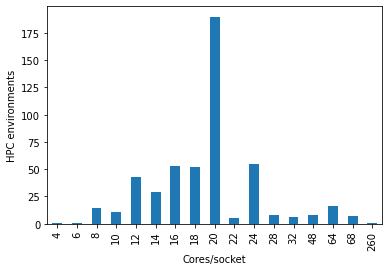

In [19]:
df['Cores per Socket'].value_counts().sort_index().plot(kind='bar',
                                                        xlabel='Cores/socket',
                                                        ylabel='HPC environments')

#### Interconnectivity:
- About <span style='color:red'>51%</span> of the HPC environments are based on `Gigabit Ethernet`, with about 2/3 of this portion deployed in China (manufactured by `Inspur`,`Lenovo` and `Sugor`).
- `Infiniband` (now part of **NVIDIA**) accounts for <span style='color:red'>31%</span>.
- `Intel Omnipath` follows from a distanced 3rd place with <span style='color:red'>9.4%</span>.
- `Custom Interconnect` contribute <span style='color:red'>7.4%</span> to the total, with about 3/4 of it based on `Cray/HPE` technology.

In [23]:
df['Interconnect Family'].value_counts()

Gigabit Ethernet       254
Infiniband             155
Omnipath                47
Custom Interconnect     37
Proprietary Network      6
Myrinet                  1
Name: Interconnect Family, dtype: int64

In [138]:
df['Interconnect Family'].value_counts(normalize=True) * 100

Gigabit Ethernet       50.8
Infiniband             31.0
Omnipath                9.4
Custom Interconnect     7.4
Proprietary Network     1.2
Myrinet                 0.2
Name: Interconnect Family, dtype: float64

In [104]:
df.groupby(['Interconnect Family', 'Manufacturer']).count()

Rank  Name  Computer  \
Interconnect Family Manufacturer                                                               
Custom Interconnect Atos                                                   1     1         1   
                    Cray Inc./Hitachi                                      2     0         2   
                    Cray/HPE                                              28    22        28   
                    IBM                                                    2     1         2   
                    NRCPC                                                  1     1         1   
                    NUDT                                                   2     2         2   
                    Preferred Networks                                     1     1         1   
Gigabit Ethernet    Amazon Web Services                                    1     1         1   
                    HPE                                                    2     2         2   
                    Huawei                                                 2     0         2   
                    Inspur                                                52     0        52   
                    Lenovo                                               157    90       157   
                    Sugon                                                 40    21        40   
Infiniband          Atipa                                                  1     1         1   
                    Atos                                                  27    27        27   
                    Cray/HPE                                               3     1         3   
                    Dell EMC                                              11    11        11   
                    Fujitsu                                                5     5         5   
                    Fujitsu / Lenovo                                       1     1         1   
                    HPE                                                   31    25        31   
                    Huawei                                                 4     3         4   
                    IBM                                                    7     7         7   
                    IBM / NVIDIA / Mellanox                                2     2         2   
                    Inspur                                                13     0        13   
                    Lenovo                                                20    14        20   
                    Lenovo/IBM                                             1     1         1   
                    MEGWARE                                                1     1         1   
                    NEC                                                    4     3         4   
                    NTT Comm. / NTT PC Comm.                               1     1         1   
                    Nvidia                                                 7     7         7   
                    Penguin Computing                                      1     1         1   
                    Quanta Computer / Taiwan Fixed Network / ASUS C...     2     2         2   
                    Self-made                                              1     0         1   
                    Sugon                                                 10     7        10   
                    T-Platforms                                            1     1         1   
                    T-Platforms, Intel, Dell                               1     1         1   
Myrinet             Lenovo                                                 1     0         1   
Omnipath            Atos                                                   3     3         3   
                    ClusterVision / Hammer                                 1     1         1   
                    Cray/HPE                                               1     1         1   
                    Dell EMC            

In [22]:
df.groupby(['Interconnect Family', 'Country']).count()

Rank  Name  Computer  Site  Manufacturer  Year  Segment  \
Interconnect Family Country                                                                         
Custom Interconnect Canada                   2     2         2     2             2     2        2   
                    China                    3     3         3     3             3     3        3   
                    France                   1     1         1     1             1     1        1   
                    India                    2     2         2     2             2     2        2   
                    Japan                    6     4         6     6             6     6        6   
                    Saudi Arabia             1     1         1     1             1     1        1   
                    South Korea              2     2         2     2             2     2        2   
                    Sweden                   1     1         1     1             1     1        1   
                    Switzerland              2     2         2     2             2     2        2   
                    United Kingdom           7     2         7     7             7     7        7   
                    United States           10     8        10    10            10    10       10   
Gigabit Ethernet    Australia                1     1         1     1             1     1        1   
                    Canada                   4     3         4     4             4     4        4   
                    China                  165    51       165   165           165   165      165   
                    Hong Kong                1     1         1     1             1     1        1   
                    Ireland                 14     6        14    14            14    14       14   
                    Japan                    1     1         1     1             1     1        1   
                    Netherlands             15    15        15    15            15    15       15   
                    Norway                   2     2         2     2             2     2        2   
                    Saudi Arabia             1     1         1     1             1     1        1   
                    Singapore                4     3         4     4             4     4        4   
                    Switzerland              1     1         1     1             1     1        1   
                    United States           45    29        45    45            45    45       45   
Infiniband          Australia                1     1         1     1             1     1        1   
                    Brazil                   4     4         4     4             4     4        4   
                    Canada                   2     2         2     2             2     2        2   
                    China                   40    18        40    40            40    40       40   
                    Czechia                  1     1         1     1             1     1        1   
                    Finland                  2     2         2     2             2     2        2   
                    France                  14    14        14    14            14    14       14   
                    Germany                 10     8        10    10            10    10       10   
                    India                    1     1         1     1             1     1        1   
                    Italy                    6     6         6     6             6     6        6   
                    Japan                   15     9        15    15            15    15       15   
                    Morocco                  1     1         1     1             1     1        1   
                    Norway                   1     1         1     1             1     1        1   
                    Poland                   2     2         2     2             2     2        2   
                    Russia                   2     2         2     2             2     2        2   
  

In [139]:
df['Interconnect'].value_counts()

10G Ethernet                                               87
25G Ethernet                                               80
40G Ethernet                                               73
Infiniband EDR                                             50
Intel Omni-Path                                            44
Infiniband FDR                                             31
Aries interconnect                                         30
Mellanox HDR Infiniband                                    13
Mellanox InfiniBand HDR100                                 12
Mellanox InfiniBand EDR                                    11
100G Ethernet                                              11
InfiniBand HDR 100                                          9
Infiniband HDR                                              8
Dual-rail Mellanox EDR Infiniband                           6
Tofu interconnect D                                         4
4xEDR Infiniband                                            3
Custom I

***
<a id='usa'></a>
## United States

In [24]:
df_usa = df[df['Country'] == 'United States']
df_usa.reset_index(drop=True, inplace=True)

#### There are 113 HPC environments

In [25]:
df_usa.shape

(113, 33)

#### `Lenovo`'s market share is <span style='color:red'>40%</span>, followed by `HPE/SGI/Cray` with <span style='color:red'>32%</span>.

In [26]:
df_usa['Manufacturer'].value_counts(normalize=True) * 100

Lenovo                    40.71
HPE                       21.24
Cray/HPE                  10.62
Penguin Computing          7.08
Dell EMC                   5.31
IBM                        4.42
Nvidia                     4.42
IBM / NVIDIA / Mellanox    1.77
Self-made                  0.88
Supermicro                 0.88
Atipa                      0.88
Amazon Web Services        0.88
Intel                      0.88
Name: Manufacturer, dtype: float64

In [29]:
df_usa['Manufacturer'].value_counts()

Lenovo                     46
HPE                        24
Cray/HPE                   12
Penguin Computing           8
Dell EMC                    6
Nvidia                      5
IBM                         5
IBM / NVIDIA / Mellanox     2
Supermicro                  1
Atipa                       1
Self-made                   1
Amazon Web Services         1
Intel                       1
Name: Manufacturer, dtype: int64

In [30]:
df_usa.groupby(['Manufacturer', 'Segment']).count()

Rank  Name  Computer  Site  Country  Year  Total Cores  \
Manufacturer            Segment                                                              
Amazon Web Services     Industry       1     1         1     1        1     1            1   
Atipa                   Research       1     1         1     1        1     1            1   
Cray/HPE                Government     4     1         4     4        4     4            4   
                        Industry       1     1         1     1        1     1            1   
                        Research       7     7         7     7        7     7            7   
Dell EMC                Academic       6     6         6     6        6     6            6   
HPE                     Academic       2     2         2     2        2     2            2   
                        Government     8     8         8     8        8     8            8   
                        Research      14    14        14    14       14    14           14   
IBM                     Academic       3     3         3     3        3     3            3   
                        Research       1     1         1     1        1     1            1   
                        Vendor         1     0         1     1        1     1            1   
IBM / NVIDIA / Mellanox Research       2     2         2     2        2     2            2   
Intel                   Industry       1     1         1     1        1     1            1   
Lenovo                  Academic       2     2         2     2        2     2            2   
                        Industry      44    28        44    44       44    44           44   
Nvidia                  Research       1     1         1     1        1     1            1   
                        Vendor         4     4         4     4        4     4            4   
Penguin Computing       Research       8     8         8     8        8     8            8   
Self-made               Industry       1     0         1     1        1     1            1   
Supermicro              Research       1     1         1     1        1     1            1   

                                    Accelerator/Co-Processor Cores  Rmax [TFlop/s]  \
Manufacturer            Segment                                                      
Amazon Web Services     Industry                                 0               1   
Atipa                   Research                                 1               1   
Cray/HPE                Government                               2               4   
                        Industry                                 0               1   
                        Research                                 0               7   
Dell EMC                Academic                                 2               6   
HPE                     Academic                                 2               2   
                        Government                               1               8   
                        Research                                 1              14   
IBM                     Academic                                 3               3   
                        Research                                 1               1   
                        Vendor                                   0               1   
IBM / NVIDIA / Mellanox Research                                 2               2   
Intel                   Industry                                 0               1   
Lenovo                  Academic                                 1               2   
                        Industry                                 0              44   
Nvidia                  Research                                 1               1   
                        Vendor                                   4               4   
Penguin Computing       Research                                 0               8   
Self-made               Industry                                 1 

#### The market is defined as follows:
- `Industry (Commercial)`: 42%, and 
- `Academy/Research`: 42%
- `Goverment`: 11%

In [31]:
df_usa['Segment'].value_counts(normalize=True) * 100
# df_usa['Segment'].value_counts()

Industry     42.48
Research     30.97
Academic     11.50
Government   10.62
Vendor        4.42
Name: Segment, dtype: float64

#### Interesting enough, 92% of the `Industry` segment is associated with `Hosting Services`, served by `Lenovo`

In [46]:
df_usa[df_usa['Segment'] == 'Industry']['Site'].value_counts(normalize=True) * 100

Hosting Services         91.67
Descartes Labs            2.08
Intel                     2.08
Petroleum Geo-Services    2.08
Facebook                  2.08
Name: Site, dtype: float64

In [61]:
df_usa[df_usa['Segment'] == 'Industry']['Manufacturer'].value_counts(normalize=True) * 100

Lenovo                91.67
Amazon Web Services    2.08
Cray/HPE               2.08
Intel                  2.08
Self-made              2.08
Name: Manufacturer, dtype: float64

#### Interconnectivity:
- While `Gigabit Ethernet` comes first with <span style='color:red'>~40%</span> usage, it must be noticed that just `Lenovo`-based environments are using it (plus a single `AWS`-based environment).
- `Infiniband` (now part of NVIDIA) accounts for <span style='color:red'>38%</span>.
- `Intel Omnipath` follows with <span style='color:red'>13.3%</span>.
- <span style='color:red'>8.9%</span> of HPC environments are using `Custom Interconnect`.


In [105]:
df_usa['Interconnect Family'].value_counts()

Gigabit Ethernet       45
Infiniband             43
Omnipath               15
Custom Interconnect    10
Name: Interconnect Family, dtype: int64

In [106]:
df_usa['Interconnect Family'].value_counts(normalize=True) * 100

Gigabit Ethernet      39.82
Infiniband            38.05
Omnipath              13.27
Custom Interconnect    8.85
Name: Interconnect Family, dtype: float64

In [107]:
df_usa.groupby(['Interconnect Family', 'Manufacturer']).count()

Rank  Name  Computer  Site  Country  Year  Segment  \
Interconnect Family Manufacturer                                                                  
Custom Interconnect Cray/HPE                    9     8         9     9        9     9        9   
                    IBM                         1     0         1     1        1     1        1   
Gigabit Ethernet    Amazon Web Services         1     1         1     1        1     1        1   
                    Lenovo                     44    28        44    44       44    44       44   
Infiniband          Atipa                       1     1         1     1        1     1        1   
                    Cray/HPE                    3     1         3     3        3     3        3   
                    Dell EMC                    5     5         5     5        5     5        5   
                    HPE                        19    19        19    19       19    19       19   
                    IBM                         4     4         4     4        4     4        4   
                    IBM / NVIDIA / Mellanox     2     2         2     2        2     2        2   
                    Lenovo                      2     2         2     2        2     2        2   
                    Nvidia                      5     5         5     5        5     5        5   
                    Penguin Computing           1     1         1     1        1     1        1   
                    Self-made                   1     0         1     1        1     1        1   
Omnipath            Dell EMC                    1     1         1     1        1     1        1   
                    HPE                         5     5         5     5        5     5        5   
                    Intel                       1     1         1     1        1     1        1   
                    Penguin Computing           7     7         7     7        7     7        7   
                    Supermicro                  1     1         1     1        1     1        1   

                                             Total Cores  Accelerator/Co-Processor Cores  \
Interconnect Family Manufacturer                                                           
Custom Interconnect Cray/HPE                           9                               0   
                    IBM                                1                               0   
Gigabit Ethernet    Amazon Web Services                1                               0   
                    Lenovo                            44                               0   
Infiniband          Atipa                              1                               1   
                    Cray/HPE                           3                               2   
                    Dell EMC                           5                               2   
                    HPE                               19                               2   
                    IBM                                4                               4   
                    IBM / NVIDIA / Mellanox            2                               2   
                    Lenovo                             2                               1   
                    Nvidia                             5                               5   
                    Penguin Computing                  1                               0   
                    Self-made                          1                               1   
Omnipath            Dell EMC                           1                               0   
                    HPE                                5                               2   
                    Intel                              1                               0   
                    Penguin Computing                  7                               0   
                    Supermicro                         1                               0   

                                

***
<a id='canada'></a>
## Canada

In [35]:
df_can = df[df['Country'] == 'Canada']
df_can.reset_index(drop=True, inplace=True)

In [13]:
df_can

,Rank,Name,Computer,Site,Manufacturer,Country,Year,Segment,Total Cores,Accelerator/Co-Processor Cores,Rmax [TFlop/s],Rpeak [TFlop/s],Nmax,Nhalf,HPCG [TFlop/s],Power (kW),Power Source,Power Efficiency [GFlops/Watts],Memory,Architecture,Processor,Processor Technology,Processor Speed (MHz),Operating System,OS Family,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent
0,82,Niagara,"ThinkSystem SD530, Xeon Gold 6248 20C 2.5GHz, ...",SciNet/University of Toronto/Compute Canada,Lenovo,Canada,2017,Research,80640,nan,"3,599.66","6,253.06","3,276,672.00",nan,nan,919.42,Submitted,3.92,nan,Cluster,Xeon Gold 6148 20C 2.4GHz,Intel Skylake,2400,CentOS,Linux,NaN,20,Xeon Gold,ThinkSystem SD530,Lenovo ThinkSystem,Infiniband,4xEDR Infiniband,North America
1,89,Cedar (GPU),"PowerEdge C6420, Xeon Silver 4216 16C 2.1GHz, ...",Simon Fraser University/Compute Canada,Dell EMC,Canada,2020,Academic,67584,"61,440.00","3,371.00","5,834.40","1,780,800.00",nan,nan,310.00,Submitted,10.87,nan,Cluster,Xeon Silver 4216 16C 2.1GHz,Intel Skylake,2100,CentOS,Linux,NVIDIA Tesla V100,16,Xeon Silver,PowerEdge C6420,Dell PowerEdge Cluster,Omnipath,Intel Omni-Path,North America
2,128,Banting,"Cray XC50, Xeon Gold 6148 20C 2.4GHz, Aries in...",Shared Services Canada,Cray/HPE,Canada,2019,Government,53200,nan,"2,676.74","4,085.76","2,799,744.00",nan,nan,nan,NaN,nan,nan,MPP,Xeon Gold 6148 20C 2.4GHz,Intel Skylake,2400,Cray Linux Environment,Linux,NaN,20,Xeon Gold,Cray XC50,Cray XC,Custom Interconnect,Aries interconnect,North America
3,138,Cedar (CPU),"PowerEdge C6420, Xeon Platinum 8160 24C 2.1GH...",Simon Fraser University/Compute Canada,Dell EMC,Canada,2020,Academic,67584,nan,"2,607.98","4,895.54","4,320,000.00",nan,nan,792.00,Submitted,3.29,nan,Cluster,Xeon Platinum 8260 24C 2.4GHz,Intel Cascade lake,2400,CentOS,Linux,NaN,24,Xeon Platinum 82xx (Cascade Lake),PowerEdge C6420,Dell PowerEdge Cluster,Omnipath,Intel Omni-Path,North America
4,139,Daley,"Cray XC50, Xeon Gold 6148 20C 2.4GHz, Aries in...",Shared Services Canada,Cray/HPE,Canada,2019,Government,53200,nan,"2,598.28","4,085.76","2,799,744.00",nan,nan,nan,NaN,nan,nan,MPP,Xeon Gold 6148 20C 2.4GHz,Intel Skylake,2400,Cray Linux Environment,Linux,NaN,20,Xeon Gold,Cray XC50,Cray XC,Custom Interconnect,Aries interconnect,North America
5,188,Béluga,"Dell EMC PowerEdge R640, Xeon Gold 6148 20C 2....",Calcul Québec/Compute Canada,Dell EMC,Canada,2019,Academic,72480,"55,040.00","2,278.00","7,494.78","2,959,104.00","790,272.00",nan,240.00,Submitted,9.49,nan,Cluster,Xeon Gold 6148 20C 2.4GHz,Intel Skylake,2400,CentOS,Linux,NVIDIA Tesla V100,20,Xeon Gold,PowerEdge R640,Dell PowerEdge Cluster,Infiniband,Infiniband EDR,North America
6,333,Software Company (M) CA3,"Lenovo C1040, Xeon E5-2673v4 20C 2.3GHz, 40G E...",Cloud Provider,Lenovo,Canada,2018,Industry,57600,nan,"1,649.11","2,119.68","8,586,432.00",nan,nan,nan,NaN,nan,nan,Cluster,Xeon E5-2673v4 20C 2.3GHz,Intel Broadwell,2300,Linux,Linux,NaN,20,Intel Xeon E5 (Broadwell),Lenovo C1040,Lenovo Cluster,Gigabit Ethernet,40G Ethernet,North America
7,334,Software Company (M) CA2,"Lenovo C1040, Xeon E5-2673v4 20C 2.3GHz, 40G E...",Cloud Provider,Lenovo,Canada,2018,Industry,57600,nan,"1,649.11","2,119.68","8,586,432.00",nan,nan,nan,NaN,nan,nan,Cluster,Xeon E5-2673v4 20C 2.3GHz,Intel Broadwell,2300,Linux,Linux,NaN,20,Intel Xeon E5 (Broadwell),Lenovo C1040,Lenovo Cluster,Gigabit Ethernet,40G Ethernet,North America
8,335,Software Company (M) CA1,"Lenovo C1040, Xeon E5-2673v4 20C 2.3GHz, 40G E...",Cloud Provider,Lenovo,Canada,2018,Industry,57600,nan,"1,649.11","2,119.68","8,586,432.00",nan,nan,nan,NaN,nan,nan,Cluster,Xeon E5-2673v4 20C 2.3GHz,Intel Broadwell,2300,Linux,Linux,NaN,20,Intel Xeon E5 (Broadwell),Lenovo C1040,Lenovo Cluster,Gigabit Ethernet,40G Ethernet,North America
9,336,NaN,"Lenovo C1040, Xeon E5-2673v4 20C 2.3GHz, 40G E...",Cloud Provider,Lenovo,Canada,2019,Industry,57600,nan,"1,649.11","2,119.6

In [14]:
df_can['Manufacturer'].value_counts(ascending=True)

Cray/HPE    2
Lenovo      5
Dell EMC    5
Name: Manufacturer, dtype: int64

#### `Academy and Research` (Compute Canada) account for <span style='color:red'>50%</span> of the HPC environments, with `Cloud Provider` contributing 1/3 of the total at 33% and the rest (~17%) associated with `Goverment` workloads.

In [15]:
df_can['Segment'].value_counts(normalize=True) * 100

Academic     41.67
Industry     33.33
Government   16.67
Research      8.33
Name: Segment, dtype: float64

<AxesSubplot:>

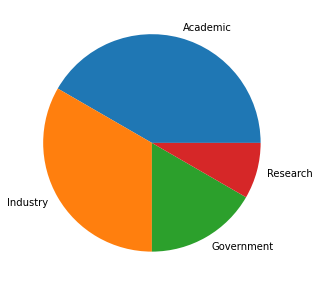

In [36]:
(df_can['Segment'].value_counts(normalize=True) * 100).plot.pie(figsize=(5, 5), ylabel='')

In [111]:
df_can['Site'].value_counts()

Simon Fraser University/Compute Canada         4
Cloud Provider                                 4
Shared Services Canada                         2
Calcul Québec/Compute Canada                   1
SciNet/University of Toronto/Compute Canada    1
Name: Site, dtype: int64

#### All the HPC environments leverage `Intel` chipset

In [115]:
df_can['Processor Technology'].value_counts(normalize=True, ascending=True) * 100

Intel Cascade lake    8.33
Intel Skylake        41.67
Intel Broadwell      50.00
Name: Processor Technology, dtype: float64

***
<a id='ww-non-china'></a>
## Worldwide, excluding China

In [38]:
df_non_china = df[df['Country'] != 'China']
df_non_china.tail(10)

,Rank,Name,Computer,Site,Manufacturer,Country,Year,Segment,Total Cores,Accelerator/Co-Processor Cores,Rmax [TFlop/s],Rpeak [TFlop/s],Nmax,Nhalf,HPCG [TFlop/s],Power (kW),Power Source,Power Efficiency [GFlops/Watts],Memory,Architecture,Processor,Processor Technology,Processor Speed (MHz),Operating System,OS Family,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent
465,466,Blue Joule,"BlueGene/Q, Power BQC 16C 1.60GHz, Custom",Science and Technology Facilities Council - Da...,IBM,United Kingdom,2012,Research,131072,nan,"1,431.10","1,677.72",nan,nan,nan,657.00,Submitted,2.18,nan,MPP,Power BQC 16C 1.6GHz,PowerPC,1600,Linux,Linux,NaN,16,Power BQC,BlueGene/Q,IBM BlueGene,Custom Interconnect,Custom Interconnect,Europe
470,471,Spirit,"SGI ICE X, Xeon E5-2670 8C 2.600GHz, Infiniban...",Air Force Research Laboratory,HPE,United States,2012,Government,73584,nan,"1,415.47","1,530.55","3,128,832.00",nan,nan,"1,606.00",Submitted,0.88,nan,Cluster,Xeon E5-2670 8C 2.6GHz,Intel SandyBridge,2600,Redhat Enterprise Linux 6,Linux,NaN,8,Intel Xeon E5 (SandyBridge),SGI ICE X,SGI ICE,Infiniband,Infiniband FDR,North America
476,477,Palmetto2,"HP SL250s /Lenovo NX360M5, Dell C4130, XL190r/...",Clemson University,HPE,United States,2013,Academic,44016,"34,452.00","1,405.00","3,553.18","1,553,664.00",nan,nan,nan,NaN,nan,nan,Cluster,Xeon E5-2665 8C 2.4GHz,Intel SandyBridge,2400,Linux,Linux,NVIDIA Tesla K20m,8,Intel Xeon E5 (SandyBridge),Cluster Platform SL250s Gen8,HP Cluster Platform 3000SL,Infiniband,Infiniband FDR,North America
480,481,MN-1,"SuperServer 4028GR-TR2, Xeon E5-2667v4 8C 3.2G...",NTT Communications Tokyo No.4 Data Center,NTT Comm. / NTT PC Comm.,Japan,2017,Industry,59392,"57,344.00","1,391.00","4,917.66","1,228,800.00",nan,nan,nan,NaN,nan,nan,Cluster,Xeon E5-2667v4 8C 3.2GHz,Intel Broadwell,3200,Ubuntu Linux,Linux,NVIDIA Tesla P100,8,Intel Xeon E5 (Broadwell),SuperServer 4028GR-TR2,Supermicro SuperServer,Infiniband,Infiniband FDR,Asia
484,485,Sid,"bullx DLC 720, Xeon E5-2695v4 18C 2.1GHz, Infi...",Atos,Atos,France,2016,Vendor,49896,nan,"1,363.48","1,676.51","2,439,936.00",nan,16.68,543.00,Submitted,2.51,nan,Cluster,Xeon E5-2695v4 18C 2.1GHz,Intel Broadwell,2100,bullx SCS,Linux,NaN,18,Intel Xeon E5 (Broadwell),bullx DLC 720,Bull Bullx,Infiniband,Infiniband FDR,Europe
485,486,SNL/NNSA CTS-1 Eclipse,"Tundra Extreme Scale, Xeon E5-2695v4 18C 2.1GH...",Sandia National Laboratories,Penguin Computing,United States,2017,Research,54648,nan,"1,361.77","1,836.17","4,268,160.00",nan,nan,nan,NaN,nan,nan,Cluster,Xeon E5-2695v4 18C 2.1GHz,Intel Broadwell,2100,Linux/TOSS,Linux,NaN,18,Intel Xeon E5 (Broadwell),Tundra Extreme Scale,Penguin Computing Cluster,Omnipath,Intel Omni-Path,North America
486,487,Curie thin nodes,"Bullx B510, Xeon E5-2680 8C 2.700GHz, Infiniba...",CEA/TGCC-GENCI,Atos,France,2012,Research,77184,nan,"1,359.00","1,667.17","5,757,528.00",nan,50.99,"2,132.00",Submitted,0.64,nan,Cluster,Xeon E5-2680 8C 2.7GHz,Intel SandyBridge,2700,bullx SUperCOmputer Suite A.E.2.1,Linux,NaN,8,Intel Xeon E5 (SandyBridge),Bullx B510,Bull Bullx,Infiniband,Infiniband QDR,Europe
494,495,Cedar,"Dell C4130, Xeon E5-2650v4 12C 2.2GHz, Intel O...",Simon Fraser University/Compute Canada,Dell EMC,Canada,2017,Academic,35712,"32,256.00","1,337.00","2,863.41","940,800.00",nan,nan,167.00,Submitted,8.01,nan,Cluster,Xeon E5-2650v4 12C 2.2GHz,Intel Broadwell,2200,CentOS,Linux,NVIDIA Tesla P100,12,Intel Xeon E5 (Broadwell),Dell C4130,Dell PowerEdge Cluster,Omnipath,Intel Omni-Path,North America
495,496,NaN,"HPE SGI 8600, Xeon Gold 6148 20C 2.4GHz, 4xEDR...",Central Research Institute of Electric Power I...,HPE,Japan,2018,Research,26400,nan,"1,326.25","2,027.52","2,525,184.00",nan,nan,357.55,Submitted,3.71,nan,Cluster,Xeon Gold 6148 20C 2.4GHz,Intel Skylake,2400,Red Hat Enterprise Linux,Linux,NaN,20,Xeon Gold,HPE SGI 8600,HPE SGI 8600,Infiniband,4xEDR Infiniband,Asia
496,497,Taiwania,"PRIMERGY CX25

In [39]:
df_non_china['Country'].value_counts().head(20)

United States     113
Japan              34
France             18
Germany            17
Netherlands        15
Ireland            14
United Kingdom     12
Canada             12
Italy               6
Saudi Arabia        5
Brazil              4
Singapore           4
Norway              3
South Korea         3
Taiwan              3
Switzerland         3
India               3
Poland              2
Russia              2
Sweden              2
Name: Country, dtype: int64

#### Market share:
- `Lenovo` takes <span style='color:red'>32.5%</span>.
- `HPE/SGI/Cray` follow with <span style='color:red'>26.2%</span>.
- `Atos` comes third at <span style='color:red'>10.8%</span>.
- `Dell EMC` is deployed in <span style='color:red'>6.3%</span>.

In [42]:
df_non_china['Manufacturer'].value_counts()

Lenovo                                                 93
HPE                                                    43
Cray/HPE                                               32
Atos                                                   31
Dell EMC                                               18
Fujitsu                                                15
IBM                                                     9
Penguin Computing                                       8
Nvidia                                                  7
NEC                                                     6
Huawei                                                  3
Intel                                                   2
IBM / NVIDIA / Mellanox                                 2
Cray Inc./Hitachi                                       2
Quanta Computer / Taiwan Fixed Network / ASUS Cloud     2
Lenovo/IBM                                              1
NEC/MEGWARE                                             1
T-Platforms, I

In [41]:
df_non_china['Manufacturer'].value_counts(normalize=True) * 100

Lenovo                                                32.52
HPE                                                   15.03
Cray/HPE                                              11.19
Atos                                                  10.84
Dell EMC                                               6.29
Fujitsu                                                5.24
IBM                                                    3.15
Penguin Computing                                      2.80
Nvidia                                                 2.45
NEC                                                    2.10
Huawei                                                 1.05
Intel                                                  0.70
IBM / NVIDIA / Mellanox                                0.70
Cray Inc./Hitachi                                      0.70
Quanta Computer / Taiwan Fixed Network / ASUS Cloud    0.70
Lenovo/IBM                                             0.35
NEC/MEGWARE                             

#### Breakdown of `Processor Technology`:
- `Intel`-based processors are used in about <span style='color:red'>87%</span> of the HPC environments.
- `AMD`, with ***Naples*** and ***Rome*** processors, contributes <span style='color:red'>7%</span>.

In [45]:
df_non_china['Processor Technology'].value_counts(normalize=True) * 100

Intel Broadwell      40.21
Intel Skylake        18.18
Intel Cascade lake   13.99
Intel Haswell         7.69
AMD Zen-2 (Rome)      6.64
Power                 3.15
Intel Xeon Phi        3.15
Intel IvyBridge       2.10
Fujitsu ARM           1.40
Intel SandyBridge     1.40
NEC Vector Engine     0.70
AMD Zen (Naples)      0.35
Sparc                 0.35
PowerPC               0.35
ThunderX2             0.35
Name: Processor Technology, dtype: float64

#### For those HPC environments using accelerators (GPU, FPGA, IPU), `NVIDIA` dominates this market with <span style='color:red'>more than 95%</span> adoption

In [16]:
df_non_china['Accelerator/Co-Processor'].value_counts(normalize=True, dropna=True) * 100

NVIDIA Tesla V100                       61.22
NVIDIA Tesla V100 SXM2                  10.20
NVIDIA Tesla P100                        8.84
NVIDIA A100                              4.08
NVIDIA Volta GV100                       2.72
NVIDIA Tesla K40                         2.04
NVIDIA Tesla K80                         1.36
Deep Computing Processor                 0.68
Matrix-2000                              0.68
Intel Xeon Phi 5110P                     0.68
NVIDIA Tesla P100 NVLink                 0.68
Nvidia Volta V100                        0.68
Preferred Networks MN-Core               0.68
Intel Xeon Phi 31S1P                     0.68
NVIDIA 2050                              0.68
NVIDIA Tesla K20x                        0.68
NVIDIA Tesla K40/Intel Xeon Phi 7120P    0.68
Intel Xeon Phi 7120P                     0.68
NVIDIA Tesla K40m                        0.68
AMD Vega 20                              0.68
NVIDIA Tesla K20m                        0.68
Name: Accelerator/Co-Processor, dt

#### Interconnectivity:
- `Infiniband` takes <span style='color:red'>40.2%</span>.
- About <span style='color:red'>31%</span> of the HPC environments are based on `Gigabit Ethernet`.
- `Intel Omnipath` follows with <span style='color:red'>15%</span>.
- `Custom Interconnect` contribute almost <span style='color:red'>12%</span> to the total, mainly based on `HPE/Cray` technology.

In [113]:
df_non_china['Interconnect Family'].value_counts()

Infiniband             115
Gigabit Ethernet        89
Omnipath                43
Custom Interconnect     34
Proprietary Network      5
Name: Interconnect Family, dtype: int64

In [114]:
df_non_china['Interconnect Family'].value_counts(normalize=True) * 100

Infiniband            40.21
Gigabit Ethernet      31.12
Omnipath              15.03
Custom Interconnect   11.89
Proprietary Network    1.75
Name: Interconnect Family, dtype: float64

In [115]:
df_non_china.groupby(['Interconnect Family', 'Manufacturer']).count()

Rank  Name  Computer  \
Interconnect Family Manufacturer                                                               
Custom Interconnect Atos                                                   1     1         1   
                    Cray Inc./Hitachi                                      2     0         2   
                    Cray/HPE                                              28    22        28   
                    IBM                                                    2     1         2   
                    Preferred Networks                                     1     1         1   
Gigabit Ethernet    Amazon Web Services                                    1     1         1   
                    HPE                                                    2     2         2   
                    Lenovo                                                86    60        86   
Infiniband          Atipa                                                  1     1         1   
                    Atos                                                  27    27        27   
                    Cray/HPE                                               3     1         3   
                    Dell EMC                                              11    11        11   
                    Fujitsu                                                5     5         5   
                    Fujitsu / Lenovo                                       1     1         1   
                    HPE                                                   31    25        31   
                    Huawei                                                 3     2         3   
                    IBM                                                    7     7         7   
                    IBM / NVIDIA / Mellanox                                2     2         2   
                    Lenovo                                                 4     4         4   
                    Lenovo/IBM                                             1     1         1   
                    MEGWARE                                                1     1         1   
                    NEC                                                    4     3         4   
                    NTT Comm. / NTT PC Comm.                               1     1         1   
                    Nvidia                                                 7     7         7   
                    Penguin Computing                                      1     1         1   
                    Quanta Computer / Taiwan Fixed Network / ASUS C...     2     2         2   
                    Self-made                                              1     0         1   
                    T-Platforms                                            1     1         1   
                    T-Platforms, Intel, Dell                               1     1         1   
Omnipath            Atos                                                   3     3         3   
                    ClusterVision / Hammer                                 1     1         1   
                    Cray/HPE                                               1     1         1   
                    Dell EMC                                               7     7         7   
                    Fujitsu                                                5     4         5   
                    HPE                                                   10    10        10   
                    Intel                                                  2     2         2   
                    Lenovo                                                 3     3         3   
                    NEC                                                    2     2         2   
                    NEC/MEGWARE                                            1     1         1   
                    Penguin Computing                                      7     7         7   
                    Supermicro          